Answers to otebook tasks
=====

Note: this notebook does not contain the answers to all the extra tasks

Notebook 1
====

In [1]:
import numpy as np

In [4]:
# Extra task 1a:
t_matrix = np.array([[0.7, 0.05, 0.25],
                    [0.35, 0.50, 0.15],
                    [0.05, 0.3, 0.65]])

# code to calculate 3 days after tired
start_m = np.array([1,0,0])
for i in range(3):
    start_m = start_m.dot(t_matrix)

start_m

array([0.4285, 0.197 , 0.3745])

Notebook 2a
====

In [ ]:
# Task 1 - filter out nans

df = df[(~df['moving'].isnull()) & (~df['micro'].isnull()) & (~df['walk'].isnull())].copy(deep = True)

In [ ]:
# Task 2 - groupby and bin to 60 secs

df = df.groupby(['id', 'bin_t']).agg(**{
            'moving' : ('moving', 'max'),
            'micro' : ('micro', 'max'),
            'walk' : ('walk', 'max')
})
df.reset_index(inplace = True)
df.rename(columns = {'bin_t' : 't'}, inplace = True)

In [ ]:
# Task 3 - create small subset

small_df = df[df['id'] == '2016-04-04_17-38-06_019aee|20'].copy(deep=True) 

small_df

In [ ]:
# Task 4 - fill in interpolation function

def fill_interpolate(data, timestep = 60):
    
    ts_seq = np.arange(min(data['t']), max(data['t']) + timestep, timestep)
    ts_seq = pd.Series(ts_seq, name = 't')
    new_df = data.merge(ts_seq, on = 't', how = 'right')
    new_df.ffill(inplace=True)

    return new_df

In [ ]:
# Extra task - linear interpolate function 

def interpolate(data, timestep = 60):

    ts_seq = np.arange(min(data['t']), max(data['t']) + timestep, timestep)
    new_df = pd.DataFrame(data = {'t' : ts_seq})
    
    for i in ['x', 'y']:

        new_df[i] = np.interp(ts_seq, data['t'].to_numpy(), data[i].to_numpy())

    return new_df

idf = interp_df.groupby('id').apply(interpolate, include_groups=False)
idf.reset_index(inplace=True, level = 0)
idf

Notebook 2b
=====

In [ ]:
# Task 1 - model parameters

model = CategoricalHMM(n_components = len(hidden_states),  n_features = len(observables), params = 'ste', init_params = 's', verbose = True)

In [ ]:
# Task 2 - for getting the lengths of each array in notebook 2b_training

len_seq_train = [len(ar) for ar in train]
len_seq_test = [len(ar) for ar in test]

In [ ]:
# Task 3 - for creating the random emission probability array in notebook 2b_training

em_prob = np.array([[np.random.random() if y == 'rand' else y for y in x] for x in em_prob_o], dtype = np.float64)
em_prob = np.array([[y / sum(x) for y in x] for x in em_prob], dtype = np.float64)

In [ ]:
# Example of how to complete the final task in notebook 2b_training

observables = ['immobile', 'micro', 'walking']
hidden_states = ['deep sleep', 'light sleep', 'quiet awake', 'active awake']

t_prob_o = np.array([['rand', 'rand', 'rand', 0.0],
                    ['rand', 'rand', 'rand', 0.0],
                    [0.0, 'rand', 'rand', 'rand'],
                    [0.0, 0.0, 'rand', 'rand']])


em_prob_o =  np.array([[1.0, 0.0, 0.0],
                    [1.0, 0.0, 0.0],
                    ['rand', 'rand', 'rand'],
                    ['rand', 'rand', 'rand']])

model = CategoricalHMM(n_components = len(hidden_states),  n_features = len(observables), n_iter = 50, tol = 5, params = 'ste', init_params = 's', verbose = True) 

save_path = '...\HMM_tutorial\data\4_state_hmm.pkl'

iterations = 10 
for i in range(iterations):

    t_prob = np.array([[np.random.random() if y == 'rand' else y for y in x] for x in t_prob_o], dtype = np.float64)
    t_prob = np.array([[y / sum(x) for y in x] for x in t_prob], dtype = np.float64)
    model.transmat_ = t_prob

    em_prob = np.array([[np.random.random() if y == 'rand' else y for y in x] for x in em_prob_o], dtype = np.float64)
    em_prob = np.array([[y / sum(x) for y in x] for x in em_prob], dtype = np.float64)
    model.emissionprob_ = em_prob

    hmm = model.fit(seq_train, len_seq_train)
    print("True Convergence:" + str(hmm.monitor_.history[-1] - hmm.monitor_.history[-2] < hmm.monitor_.tol)) # If it converges rather than max iterations print True
    print("Final log liklihood score:" + str(hmm.score(seq_train, len_seq_train))) # Print the final log liklihood score

    score = hmm.score(seq_test, len_seq_test) 

    if best_score is None or best_score < score:
        best_score = score
        best_model = hmm
        print('New Matrix: \n')
        print(f'Transition matrix: \n {hmm.transmat_} \n')
        print(f'Emission probabilities: \n {hmm.emissionprob_}')

with open(save_path, "wb") as file: pickle.dump(best_model, file)
hmm_display(hmm, hidden_states, observables)

Notebook 2c
====

In [ ]:
# Example of how to complete the model score final task in notebook 2c_validating

aic = []
bic = []
lls = []
ns = [2, 4, 6, 8]
for n in ns:
    print(f'Beginning training {n} states')
    best_ll = None
    best_model = None

    for i in range(10):

        h = CategoricalHMM(n_components = n,  n_iter = 20, tol = 5, n_features = len(observables), params = 'ste', init_params = 'ste') 
        h.fit(seq_all, len_seq_all)
        score = h.score(seq_all, len_seq_all)
        if not best_ll or score > best_ll:
            best_ll = score
            best_model = h

    aic.append(best_model.aic(seq_all, len_seq_all))
    bic.append(best_model.bic(seq_all, len_seq_all))
    lls.append(best_model.score(seq_all, len_seq_all))

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ln1 = ax.plot(ns, aic, label="AIC", color="blue", marker="o")
ln2 = ax.plot(ns, bic, label="BIC", color="green", marker="o")
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()

Example of what the plot for above should look like

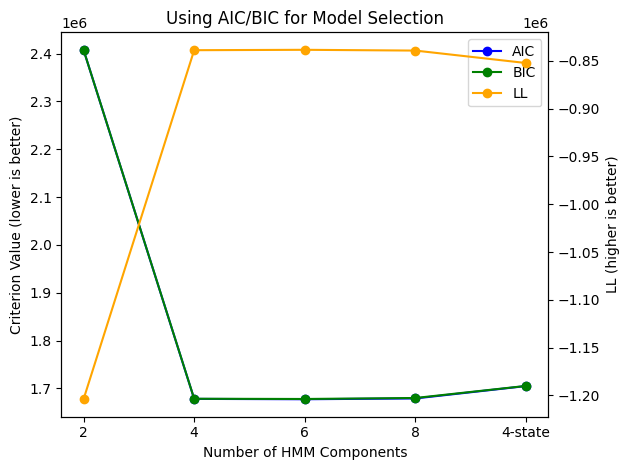

As you can see increasing the number of hidden states improves the model. Whilst the 4_state model performs slightly worse, we know its outputs and transitions are more biologically relevant, as the other models can have the sleep states emit movement which would be wrong. The score itself is mostly useful for seeing if you are overfitting a model by increasing the complexity and for general liklihood scoring, so alwasy balance it with your own knowledge.